Rafael Beltrán Hernández - 201712170

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import stressTransformations as s
from IPython.display import Image

In [4]:
def vonMissesG(sy,s1,s2):
    tmax = (s1+s2)/2
    T = np.linspace(0,2*np.pi)
    x = lambda t: sy*np.sqrt(2)*np.cos(t)*np.cos(np.radians(45)) - sy * np.sin(t) * np.sin(np.radians(45)) *np.sqrt(2/3) # Ecuacion Parametrica
    y = lambda t: sy*np.sqrt(2)*np.cos(t)*np.sin(np.radians(45)) + sy * np.sin(t) * np.cos(np.radians(45)) *np.sqrt(2/3)
    plt.figure(dpi=250)
    plt.hlines(0,min(x(T)),max(x(T)),'k')
    plt.vlines(0,min(y(T)),max(y(T)),'k')
    plt.title('Falla von Misses')
    plt.plot(x(T),y(T))
    plt.grid(True)
    plt.show()

def vonMisses(s1,s2):
    ans = np.sqrt(s1**2 - s1*s2 + s2**2)
    return (ans)

Para el uso de la teoría de Von Misses, se utiliza la siguiente fórmula:
\begin{equation}
    \sigma_{vm} = \sqrt{\sigma_1^2 - \sigma_1 \sigma_2  + \sigma_2^2}
\end{equation}  

# Factores de seguridad barra de Acero AISI

In [5]:
sy = 47.1 # ksi
n_shear = lambda t: sy/(2*t)
n_vm = lambda s1,s2: sy/vonMisses(s1,s2)

* a) $\sigma_ a= 30 ksi \quad \sigma_b = 30 ksi$

In [6]:
ta = 30/2
print('Para la teoría de esfuerzo cortante máximo se tiene un factor de seguridad de',n_shear(ta))
print('Para la teoría de Von Misses se tiene un valor de n =',n_vm(30,30))

Para la teoría de esfuerzo cortante máximo se tiene un factor de seguridad de 1.57
Para la teoría de Von Misses se tiene un valor de n = 1.57


* b) $\sigma_ a= 30 ksi \quad \sigma_b = -30 ksi$

In [7]:
tb = 30
print('Para la teoría de esfuerzo cortante máximo se tiene un factor de seguridad de',n_shear(tb))
print('Para la teoría de Von Misses se tiene un valor de n =',n_vm(30,-30))

Para la teoría de esfuerzo cortante máximo se tiene un factor de seguridad de 0.785
Para la teoría de Von Misses se tiene un valor de n = 0.9064399226277124


* c) $\sigma_ a= 30 ksi \quad \sigma_b = 15 ksi$

In [8]:
tc = (30)/2
print('Para la teoría de esfuerzo cortante máximo se tiene un factor de seguridad de',n_shear(tc))
print('Para la teoría de Von Misses se tiene un valor de n =',n_vm(30,15))

Para la teoría de esfuerzo cortante máximo se tiene un factor de seguridad de 1.57
Para la teoría de Von Misses se tiene un valor de n = 1.812879845255425


* d) $\sigma_ a= -30 ksi \quad \sigma_b = -15 ksi$

In [9]:
td = (30)/2
print('Para la teoría de esfuerzo cortante máximo se tiene un factor de seguridad de',n_shear(td))
print('Para la teoría de Von Misses se tiene un valor de n =',n_vm(-30,-15))

Para la teoría de esfuerzo cortante máximo se tiene un factor de seguridad de 1.57
Para la teoría de Von Misses se tiene un valor de n = 1.812879845255425


* e) $\sigma_ a= -50 ksi \quad \sigma_b = 10 ksi$

In [10]:
te = 30
print('Para la teoría de esfuerzo cortante máximo se tiene un factor de seguridad de',n_shear(te))
print('Para la teoría de Von Misses se tiene un valor de n =',n_vm(10,-50))

Para la teoría de esfuerzo cortante máximo se tiene un factor de seguridad de 0.785
Para la teoría de Von Misses se tiene un valor de n = 0.8459409725461099


# Hierro Fundido ASTM 30

In [11]:
st,sc = 31,109 # Esfuerzos de falla para tensión y compresión en ksi 
n_mc = lambda sa , sb: (sa/st -sb/sc)**(-1) # Factor de seguridad para Mohr Coulomb
def n_MM(sa,sb): # Factor de seguridad para Mohr Modificado
    sa = float(sa)
    sb = float(sb)
    if (sa > 0) & (sb >0.0): # ambos positivos
        n = st/sa
    elif ((sa * sb) < 0.0) & (abs(sb/sa) <= 1.0): #Signos contrarios y razon de esfuerzos menor o igual a 1
        n = st/sa
    elif (sa * sb < 0.0) & (abs(sb/sa) > 1.0): #Signos contrarios y razon de esfuerzos estrictamente mayor a 1
        n = (sa*(sc-st)/(sc*st) - sb/sc)**(-1.0)
    else:
        n = -sc/sb

    return(n)

* a) $\sigma_x = 15 \;ksi \quad \sigma_y = 10 \; ksi \quad \tau_{xy} =0 \; ksi$ 

In [12]:
sa,sb = s.SigmaPr(15,10,0)
print('Los esfuerzos principales son',sa,sb)
print('Para Mohr normal es factor de diseño es',n_mc(sa,sb))
print('Para Mohr modificado el factor de seguridad es',n_MM(sa,sb))

Los esfuerzos principales son 15.0 10.0
Para Mohr normal es factor de diseño es 2.550188679245283
Para Mohr modificado el factor de seguridad es 2.066666666666667


* b) $\sigma_x = 15 \;ksi \quad \sigma_y = -50 \; ksi \quad \tau_{xy} =0 \; ksi$ 

In [13]:
sa,sb = s.SigmaPr(15,-50,0)
print('Los esfuerzos principales son',sa,sb)
print('Para Mohr normal es factor de diseño es',n_mc(sa,sb))
print('Para Mohr modificado el factor de seguridad es',n_MM(sa,sb))

Los esfuerzos principales son 15.0 -50.0
Para Mohr normal es factor de diseño es 1.060910518053375
Para Mohr modificado el factor de seguridad es 1.2422794117647058


* c) $\sigma_x = 15 \;ksi \quad \sigma_y = 0 \; ksi \quad \tau_{xy} =-10 \; ksi$ 

In [14]:
sa,sb = s.SigmaPr(15,0,-10)
print('Los esfuerzos principales son',sa,sb)
print('Para Mohr normal es factor de diseño es',n_mc(sa,sb))
print('Para Mohr modificado el factor de seguridad es',n_MM(sa,sb))

Los esfuerzos principales son 20.0 -5.0
Para Mohr normal es factor de diseño es 1.4471092077087793
Para Mohr modificado el factor de seguridad es 1.55


* d) $\sigma_x = -10 \;ksi \quad \sigma_y = -25 \; ksi \quad \tau_{xy} =-10 \; ksi$ 

In [15]:
sa,sb = s.SigmaPr(-10,-25,-10)
print('Los esfuerzos principales son',sa,sb)
print('Para Mohr normal es factor de diseño es',n_mc(sa,sb))
print('Para Mohr modificado el factor de seguridad es',n_MM(sa,sb))

Los esfuerzos principales son -5.0 -30.0
Para Mohr normal es factor de diseño es 8.776623376623375
Para Mohr modificado el factor de seguridad es 3.6333333333333333


# Maquina de Acero

El valor del esfuerzo de fluencia para la teoria de Von Misses de falla es de 346.41016151377545 MPa


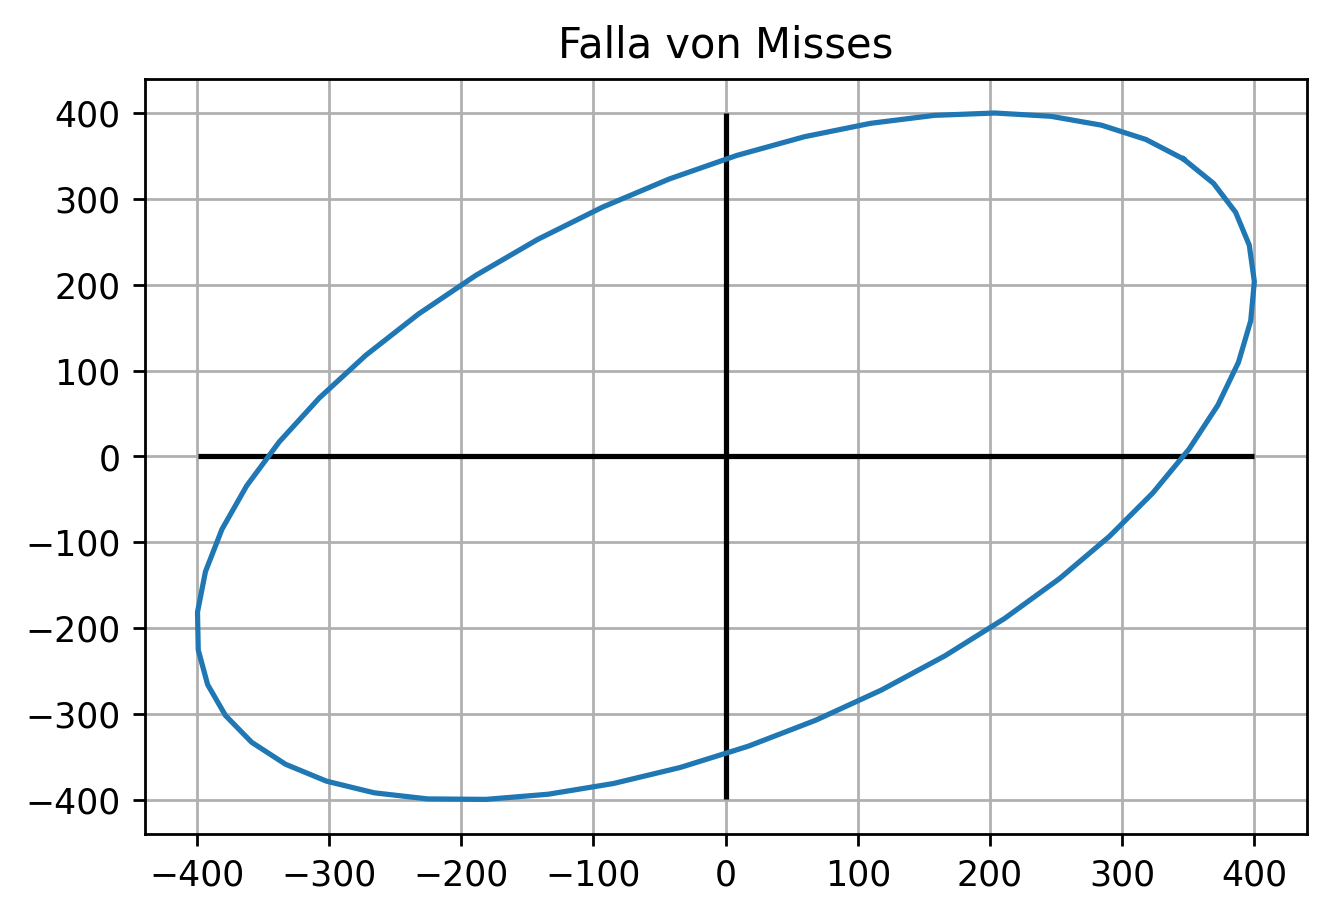

In [16]:
sa, sb = 200,100
s_y = lambda s: 2*s # Funcion que nos da el valor del esfuerzo de fluencia
# Teoria von Misses
vm = vonMisses(200,100)
y1 = s_y(vm)
print('El valor del esfuerzo de fluencia para la teoria de Von Misses de falla es de',y1,'MPa')
vonMissesG(y1,200,100)

Para el caso de la teoría de máximo esfuerzo cortante, se tiene que el factor de diseño $n$ se relaciona con el esfuerzo de fluencia mediante $n=S_y/2\tau_{max}$

In [17]:
tmax = s.TauMax(200,100,0)
print('El máximo esfuerzo cortante es de',tmax,'MPa')
y2 = s_y(2*tmax)
print('El esfuerzo de fluencia para esta teoria es de',y2,'MPa')

El máximo esfuerzo cortante es de 50.0 MPa
El esfuerzo de fluencia para esta teoria es de 200.0 MPa


# Barra de acero empotrada

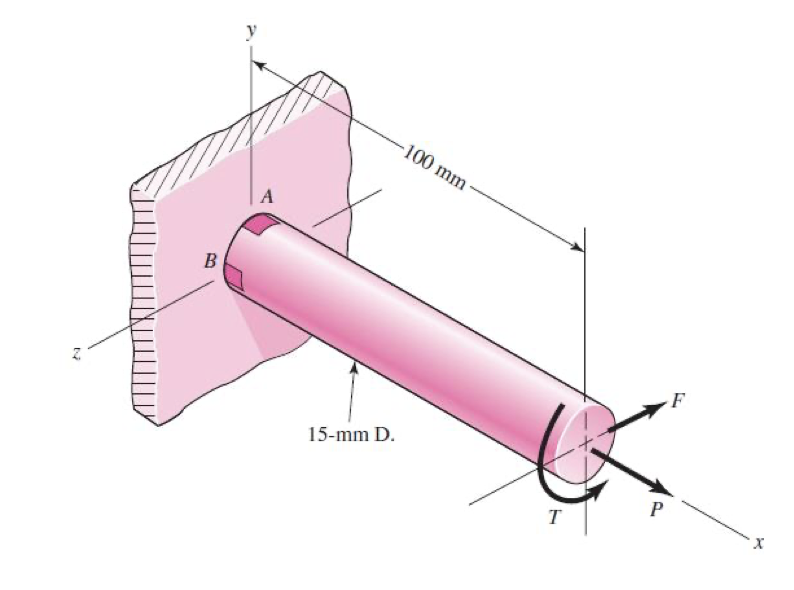

In [18]:
Image(filename='Imagenes Tareas/BarraEmpotrada.png')

In [21]:
F = 550
P = 4000
T = 25
D = 15/1000
r = D/2
J = np.pi*(r**4)/2 # Momento polar de inercia
A = np.pi*(r**2)
Sy = 350e+6

Empezamos analizando el estado de esfuerzos en A, donde la carga $P$ establece un esfuerzo normal $\sigma_{x_A}$ y $F$ junto con $T$ establecen un esfuerzo cortante. Entonces el estado de esfuerzos está de la forma:
* $\sigma_{x_A} = P/A$ 
* $\sigma_{z_A} = 0$
* $\tau_{xz_A}= -\frac{TD}{2J} + \frac{F}{A}$

Ahora se harán los cálculos y gráfica de VonMisses de este punto para este estado de esfuerzos

Los esfuerzos principales son de 47.734264310591755 -25.09889462641108 MPa


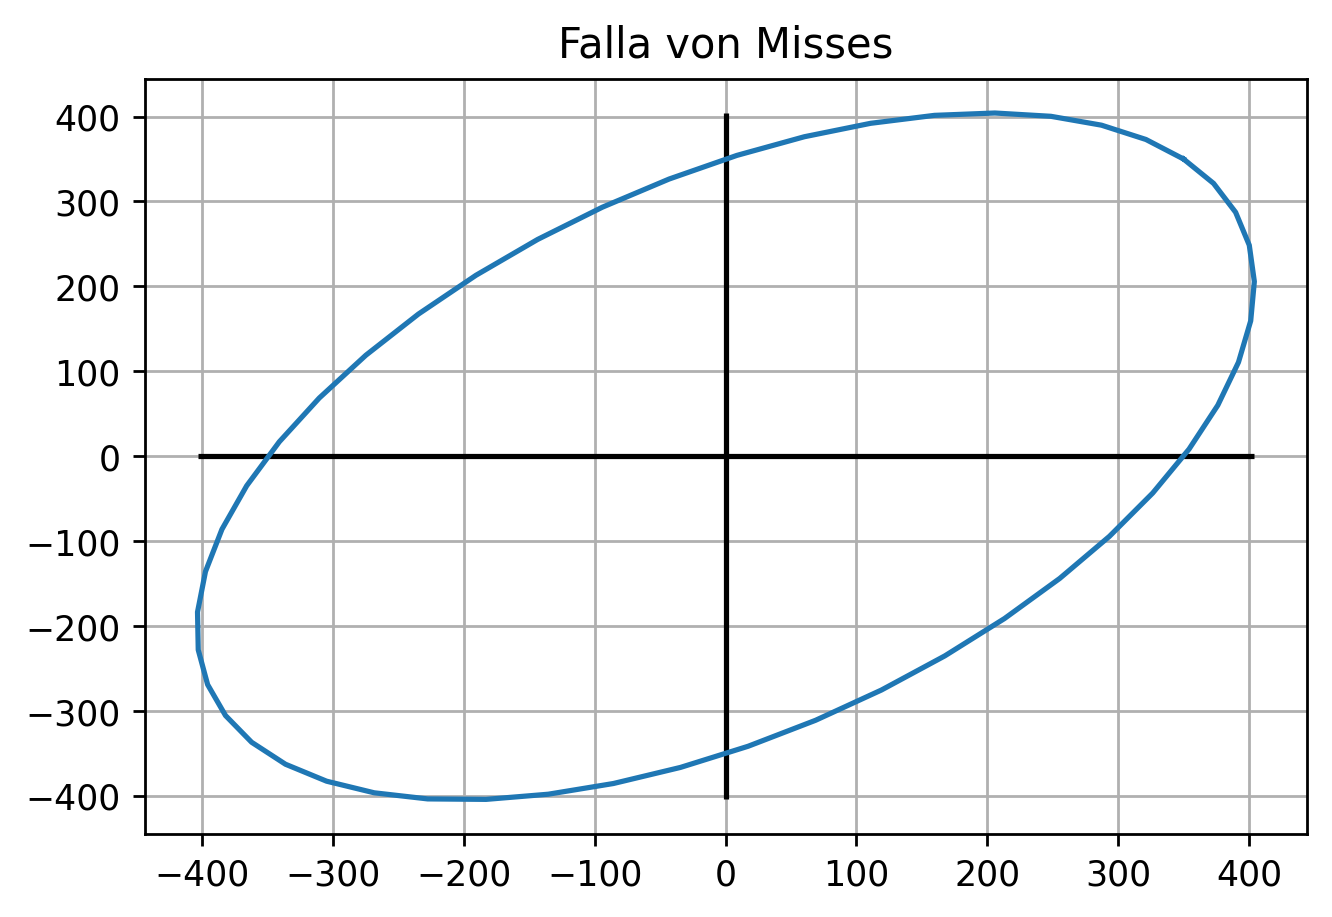

In [26]:
sx = P/A
sz = 0
tauA = -T*r/(J) + F/A
a1,a2 = s.SigmaPr(sx,sz,tauA)
print('Los esfuerzos principales son de',a1*(1e-6),a2*(1e-6),'MPa')
vonMissesG(Sy*(1e-6),a1*(1e-6),a2*(1e-6))

In [27]:
# Factor de Seguridad
print('El factor de seguridad en A es de',Sy/(np.sqrt(a1*a1 + a2*a2 - a1*a2)))

El factor de seguridad en A es de 5.46169291384076


Se realiza un procedimiento similar en el punto B, solo que en este punto se tiene un esfuerzo normal influenciado por la flexión asociada a la carga $F$. Entonces el estado de esfuerzos está dado por:

* $\sigma_{x_B} = \frac{P}{A} + \frac{FL r}{I}$
* $\sigma_{z_B} = 0$
* $\tau_{xz_B} = \frac{-Tr}{J}$

Ahora se calculará el factor de seguridad

Los esfuerzos principales son de 195.89337053386032 -7.265289832354709 MPa


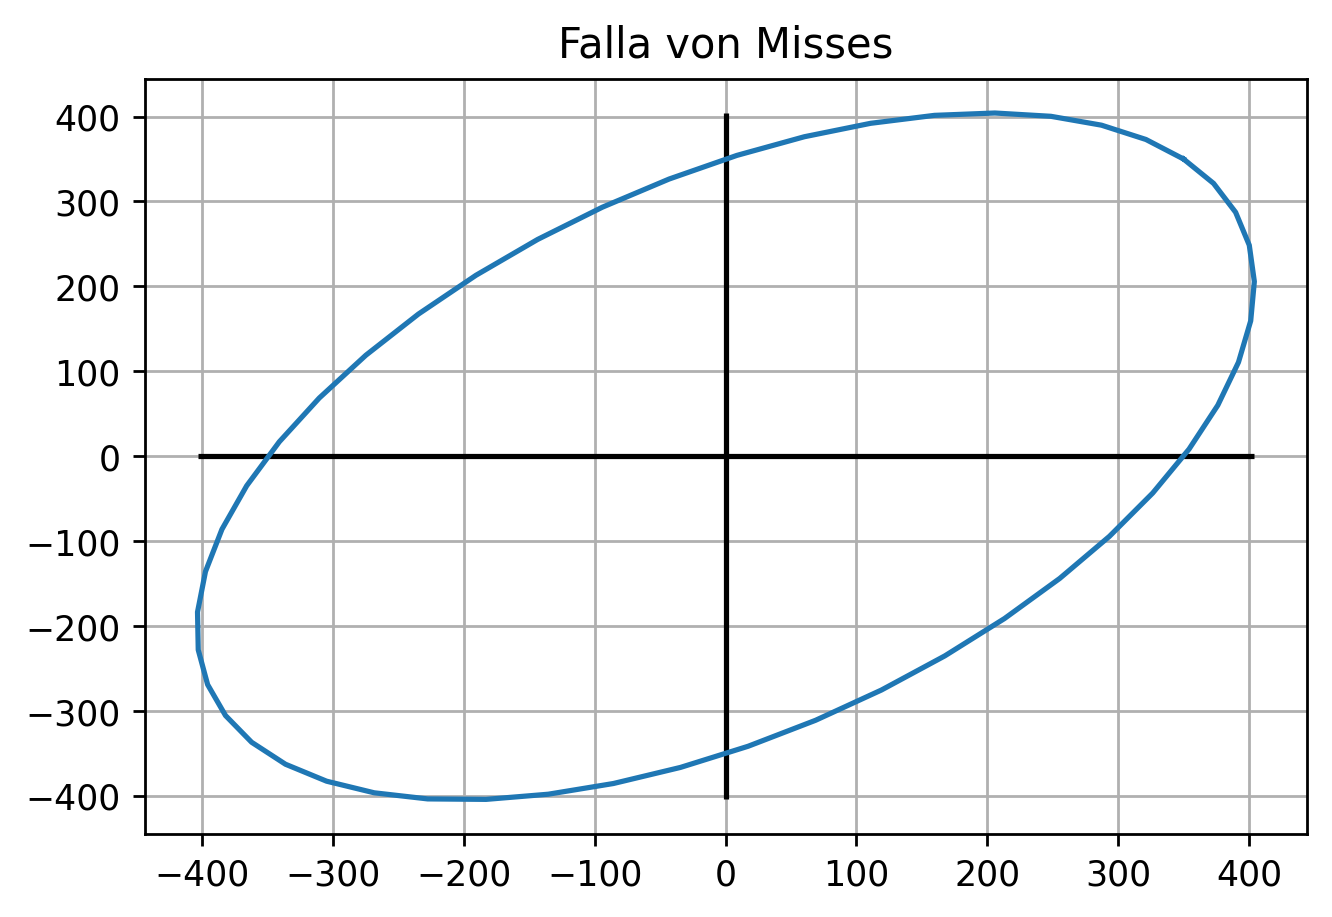

In [28]:
I = np.pi*(r**4)/4
sx = P/A + F*0.1*r/I
sz = 0
tauB = -T*r/(J)
b1,b2 = s.SigmaPr(sx,sz,tauB)
print('Los esfuerzos principales son de',b1*(1e-6),b2*(1e-6),'MPa')
vonMissesG(Sy*(1e-6),b1*(1e-6),b2*(1e-6))

In [29]:
# Factor de Seguridad
print('El factor de seguridad en A es de',Sy/(np.sqrt(b1*b1 + b2*b2 - b1*b2)))

El factor de seguridad en A es de 1.7532856860608137
